# 2022 Fuel Consumption Ratings

### Author: Chen Yu, Yueyi An

## Introduction:
Dataset provides model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada in 2022.
Below we do some exploration on this dataset, we try to find out what information is related to fuel consumption.

### Preliminary preparation
We try to import some installation packages to be used

In [1]:
!pip install seaborn
!pip install plotly

In [21]:
%matplotlib inline
import cartopy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot
import ipywidgets as widgets
import plotly
import contextily as ctx
import io
import requests
from ipywidgets import interact, interactive, fixed, interact_manual

# FINAL-PART1 (4/18)

Let's have a detailed introduction to the dataset and some simple exploration and analysis.

In [25]:
df = pd.read_csv(r"C:\Users\david\Desktop\IS455-fianl\MY2022 Fuel Consumption Ratings.csv")
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [4]:
df.nunique().sort_values(ascending = False)

Model                                715
CO2 Emissions(g/km)                  242
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (mpg))          49
Make                                  39
Engine Size(L)                        36
Transmission                          23
Vehicle Class                         14
CO2 Rating                            10
Cylinders                              8
Smog Rating                            5
Fuel Type                              4
Model Year                             1
dtype: int64

## Dataset Features

In this dataset, it represents the  fule consuptions rate for each 2022 vehicle's make and model. 
This dataset includes 15 columns of variables and 946 rows of data.
columns： Model Year(numerical)
        Make(Categorical)
        Model(Categorical)
        Engine Size(numerical)
        Cylinders(numerical)
        Transimission (categorical)
        Fuel Type(categorical)
        Fuel Consumption city(numerical)
        Fuel Consumption hwy(numerical)
        Fuel Consumption comb(numerical)
        Fuel Consumption comb mpg(numerical)
        CO2 emission (numerical)
        CO2 rating(numerical)
        Smog rating(numerical)
rows: specification data for each vehicle.

## Dataset exploration

After exploring this dataset, we figure out that since it's only about 2022 model, so we can't make a comparison between same modles made in different year.
But we can show the comparison on ruel consumption between different brand, vehicle class, engine size, cylinders and  transmission. 
Meanwhile we can also have use count to get numaber of vehicles each brand is selling, number of vehicles is using diffrent cylinders
and number of vehicles using different engine size.
We will nof focus on the data related to CO2 and smog for now. Since it needs statistical method to help prove the relationship.

## Dataset Information

1. Dataset name: 2022 Fuel Consumption Ratings

2. Data Sources: Kaggle. URL: https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings

3. License: CC0: Public Domain. 
The person applying the text to the work has contributed the work to the public domain and, to the extent permitted by law, waives all his worldwide rights in the work under copyright law, including all related and adjacent rights.
We can copy, modify, distribute and perform this work, even for commercial purposes, without requiring consent.

4. File size: 73.01KB


## Simple Drawing

 The following is a simple bar chart to show the comparison of fuel consumption of different brands of cars.

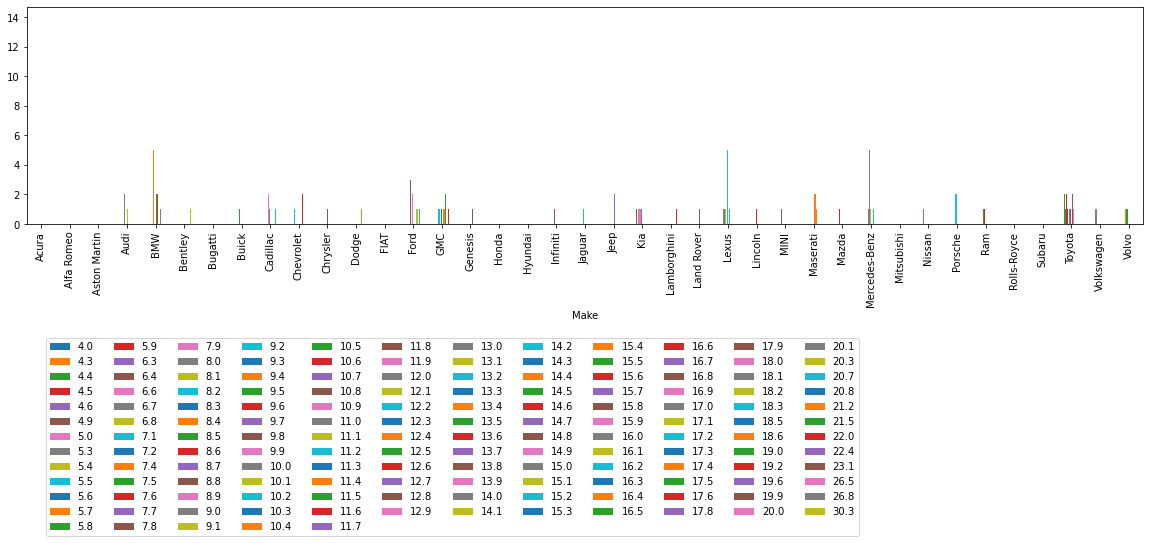

In [5]:
df.groupby('Make')['Fuel Consumption (City (L/100 km)'].value_counts().unstack().plot(kind='bar',figsize=(20, 4))
plt.legend(bbox_to_anchor =(0.75, -0.5), ncol = 12)

Also,it is divided according to the Engine Size(L), and a bar graph is made to observe the influence of the Engine Size(L) on the fuel consumption.

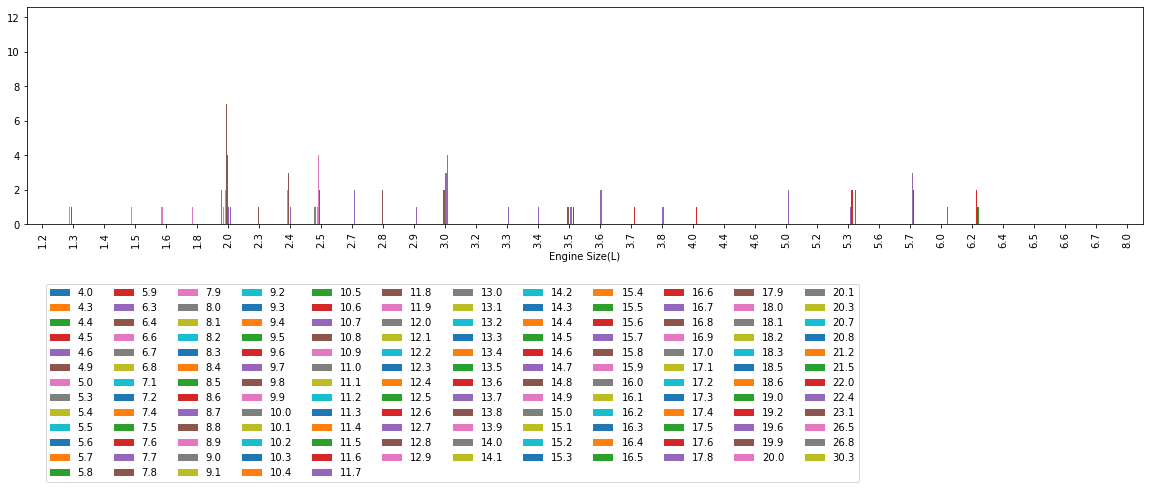

In [6]:
df.groupby('Engine Size(L)')['Fuel Consumption (City (L/100 km)'].value_counts().unstack().plot(kind='bar',figsize=(20, 4))
plt.legend(bbox_to_anchor =(0.75, -0.25), ncol = 12)

### Contribute:
Shen Yu: Dataset Features,Dataset exploration 


Yueyi An: Dataset Information, Simple Drawing

# Final-Part 2 (4/25)

Coming to the fun part, we created an interactive dashboard that can arbitrarily transform the relationships between the data we want to explore. Variable X-axis and Y-axis, easy to explore data, let's try it together!

In [7]:
@widgets.interact(feature1=['Make', 'Model','Transmission', 'Vehicle Class'], feature2=['Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)'])
def create_plt(feature1, feature2):
    with plt.style.context("ggplot"):

        df_sub = df[[feature1, feature2]]
        df_sub = df_sub.groupby(feature1).sum().sort_values(by = feature2, ascending = False).reset_index()
        plt.figure(figsize = (30,20))
        sns.catplot(x = feature1, y = feature2, kind = 'bar', data = df_sub, palette='viridis')
        plt.xticks(rotation = 90, fontsize = 10)


        plt.xlabel(feature1.capitalize())
        plt.ylabel(feature2.capitalize())

        plt.title("%s vs %s"%(feature1.capitalize(), feature2.capitalize()))

interactive(children=(Dropdown(description='feature1', options=('Make', 'Model', 'Transmission', 'Vehicle Clas…

## Prose

In this section, we first plotted the fuel comparison between different makes, models, vehicle class and transmissions. The bar chart is more intuitive to sort the fuel consumption according to the classification we want.

Second, we draw the variable modules, which set variable X-axis and variable Y-axis data respectively. 
X-axis optional data includes: 'Make', 'Model', 'Transmission', 'Vehicle Class
Y-axis optional data includes: 'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)'

From an analytical point of view, we prefer to define the X-axis as our category (independent variable), and the Y-axis corresponds to the data we want to know about the classification (dependent variable). But in terms of operation, it is also operable to change only the X-axis data based on the Y-axis.

For example, when we select Model as the category on the X-axis, CO2 Emissions(g/km) as the data on the Y-axis. 
Then we will get a comparative data graph of carbon dioxide emissions produced by different models of cars.
When the parameter of the Y-axis is changed to the Fuel Consumption(Comb (mpg)), the picture will generate a corresponding comparison chart of the Fuel Consumption(Comb (mpg)) of different models of vehicles.

In the same way, we keep the Y-axis parameters unchanged, for example, the Y-axis selects Fuel Consumption (City (L/100 km), and the X-axis parameters are constantly adjusted to different categories such as Model, vehicle class, Makes and transmissions, and it willgenerate a data comparison chart of different Fuel Consumption (City (L/100 km).

We create a dashboard with two variable factors, which can make a graph contain many different combinations so that people who want to use the data set to obtain information can more easily and concisely obtain the knowable information of their custom information.


The main information in this dataset is the 2022 fuel consumption rating, which contains data such as CO2 emissions and fuel consumption for the smog rating.
The main question of our project was "What causes the different fuel consumption and CO2 emissions."
We will focus on Make, Model, Vehicle Class, these categories, and mainly create the classification and optional data of these categories, and make them into bar charts to enhance the comparison, so as to study these categories, explore relationship between each category and CO2 emissions and fuel consumption.

### Contribute:
Shen Yu: Dataset Dashboard 


Yueyi An: Help with the dashboard and writing the prose

# Final - Part 3 (5/2)

Let's go a step further and see what relationships exist between the different variables in the study dataset, which factors are more strongly correlated！

<AxesSubplot:title={'center':'Correlation between different variables'}>

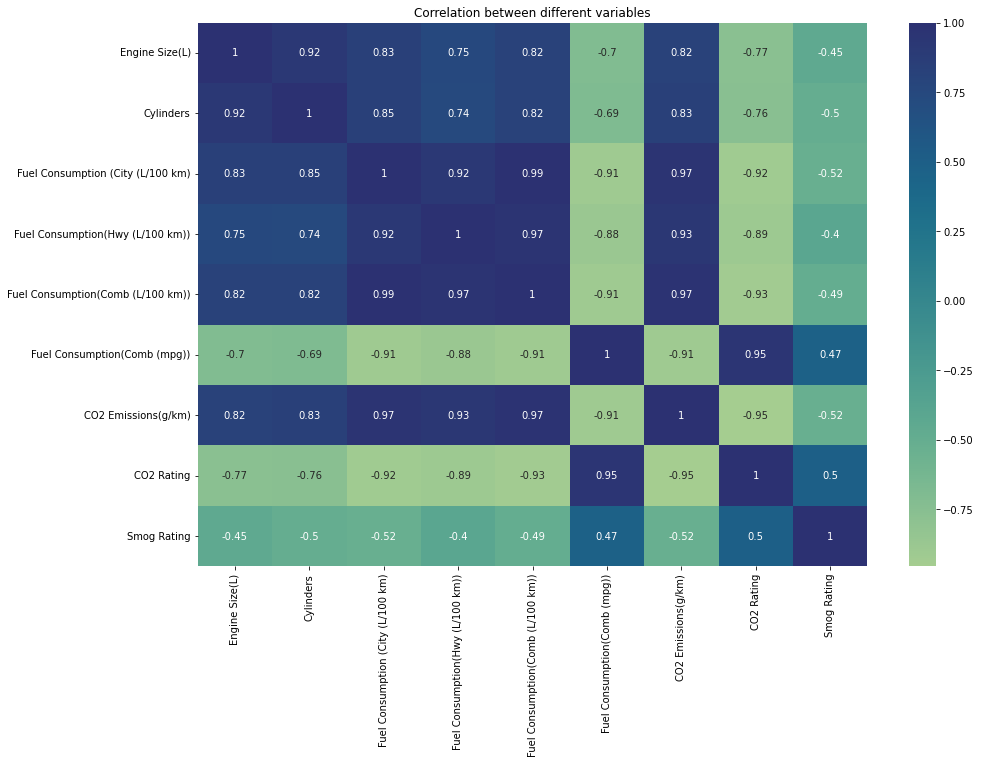

In [8]:
corr_matrix = df.drop(['Model Year'], axis = 1).corr()
plt.figure(figsize=(15,10))
plt.title("Correlation between different variables")
sns.heatmap(corr_matrix, annot = True, cmap='crest')

We seem to have obtained the above correlation chart, let us focus on the research and comparison of several data with strong correlation

<Figure size 720x432 with 0 Axes>

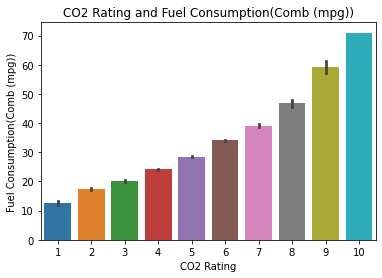

<Figure size 720x432 with 0 Axes>

In [9]:
plt.title("CO2 Rating and Fuel Consumption(Comb (mpg))")
sns.barplot(x= df["CO2 Rating"],y= df["Fuel Consumption(Comb (mpg))"])
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

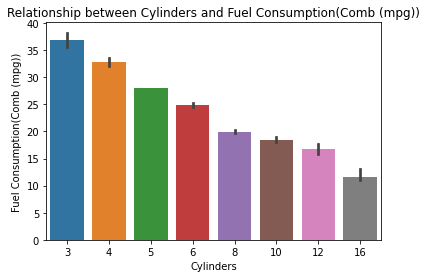

<Figure size 720x432 with 0 Axes>

In [10]:
plt.title("Relationship between Cylinders and Fuel Consumption(Comb (mpg))")

sns.barplot(x= df["Cylinders"],y= df["Fuel Consumption(Comb (mpg))"]) 

plt.figure(figsize=(10,6)) 

<Figure size 1440x864 with 0 Axes>

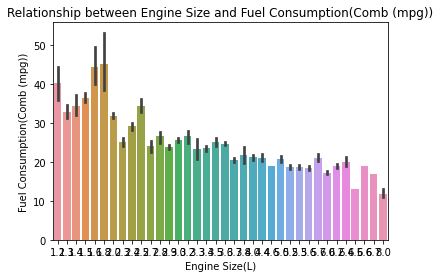

<Figure size 1440x864 with 0 Axes>

In [11]:
plt.title("Relationship between Engine Size and Fuel Consumption(Comb (mpg))")

sns.barplot(x= df["Engine Size(L)"],y= df["Fuel Consumption(Comb (mpg))"]) 

plt.figure(figsize=(20,12)) 

In [5]:
mixtable = pd.pivot_table(data=df,index=['Make'],values=['Fuel Consumption(Comb (mpg))', 'Fuel Consumption(Comb (L/100 km))'], aggfunc=np.mean)
mixtable.head()

NameError: name 'df' is not defined

In [6]:
mixtable.plot(kind='barh',width=0.5, align='edge')
plt.title("Relationship between Make, Fuel Consumption in mpg and L/100 km")
plt.legend(bbox_to_anchor =(0.75, -0.1), ncol = 10)
plt.rcParams['figure.figsize'] = [10, 20]

NameError: name 'mixtable' is not defined

In [7]:
classtable = pd.pivot_table(data=df,index=['Vehicle Class'], values=['Fuel Consumption(Comb (mpg))', 'Fuel Consumption(Comb (L/100 km))'], aggfunc=np.mean)
classtable.head()

NameError: name 'df' is not defined

In [8]:
classtable.plot(kind='barh', width=0.5, align='edge')
plt.title("Relationship between Vehicle Class, Fuel Consumption in mpg and L/100 km")
plt.legend(bbox_to_anchor =(0.75, -0.1), ncol = 12)
plt.figure(figsize=(10,15))

NameError: name 'classtable' is not defined

### Contribute:
Shen Yu & Yueyi An: Graphic drawing, content writing